In [1]:
import sys
sys.path.append('..')
from collections import Counter

from torchvision import datasets
from torch.utils.data import random_split
from torch import cat, Generator
import matplotlib.pyplot as plt

from semantic_segmentation_voc.transforms import pair_transforms_train, pair_transforms_val
from semantic_segmentation_voc.utils import display_images

/home/tgniazdo/semantic segmentation VOC/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_ds = datasets.VOCSegmentation("data", 
                                    year="2012", 
                                    image_set="train", 
                                    transforms=pair_transforms_train, 
                                    download=False)
val_test_ds = datasets.VOCSegmentation("data", 
                                       year="2012", 
                                       image_set="val", 
                                       transforms=pair_transforms_val, 
                                       download=False)
val_ds, _ = random_split(val_test_ds, [0.5, 0.5], generator=Generator().manual_seed(42))

In [3]:
f'Num samples in train dataset: {len(train_ds)}, num samples in validation dataset: {len(val_ds)}'

'Num samples in train dataset: 1464, num samples in validation dataset: 725'

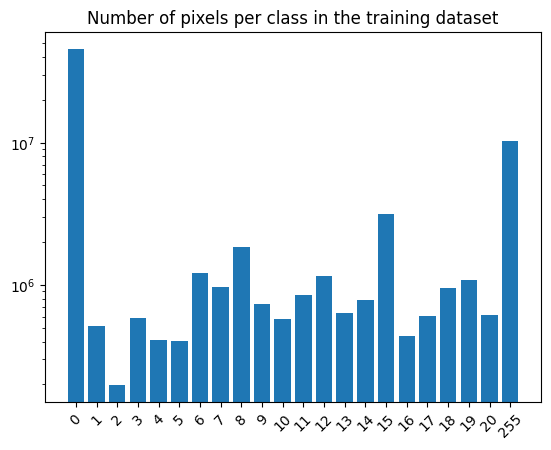

In [4]:
all_pxls_train_ds = cat([y.flatten() for _, y in train_ds], dim=0)
all_pxls_ctr = dict(Counter(all_pxls_train_ds.numpy()))
all_pxls_ctr = dict(sorted(all_pxls_ctr.items(), key=lambda item: item[0]))
plt.bar([str(k) for k in all_pxls_ctr.keys()], all_pxls_ctr.values())
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Number of pixels per class in the training dataset')
plt.show()

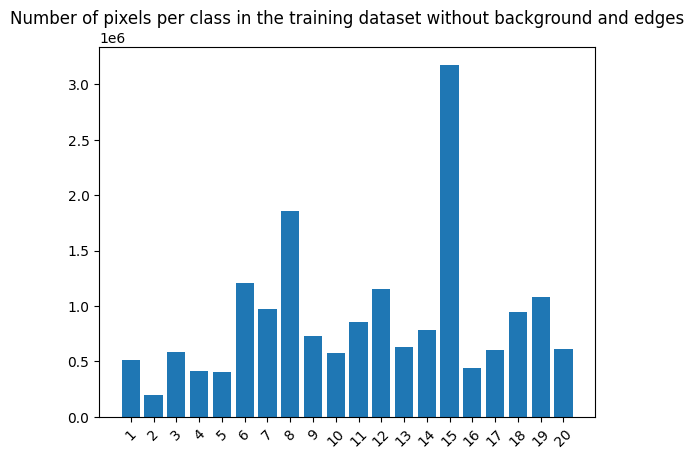

In [5]:
all_pxls_ctr = dict(Counter(all_pxls_train_ds.numpy()))
all_pxls_ctr = dict(sorted(all_pxls_ctr.items(), key=lambda item: item[0])[1:-1])
plt.bar([str(k) for k in all_pxls_ctr.keys()], all_pxls_ctr.values())
plt.xticks(rotation=45)
plt.title('Number of pixels per class in the training dataset without background and edges')
plt.show()

100%|██████████| 20/20 [00:00<00:00, 5277.18it/s]

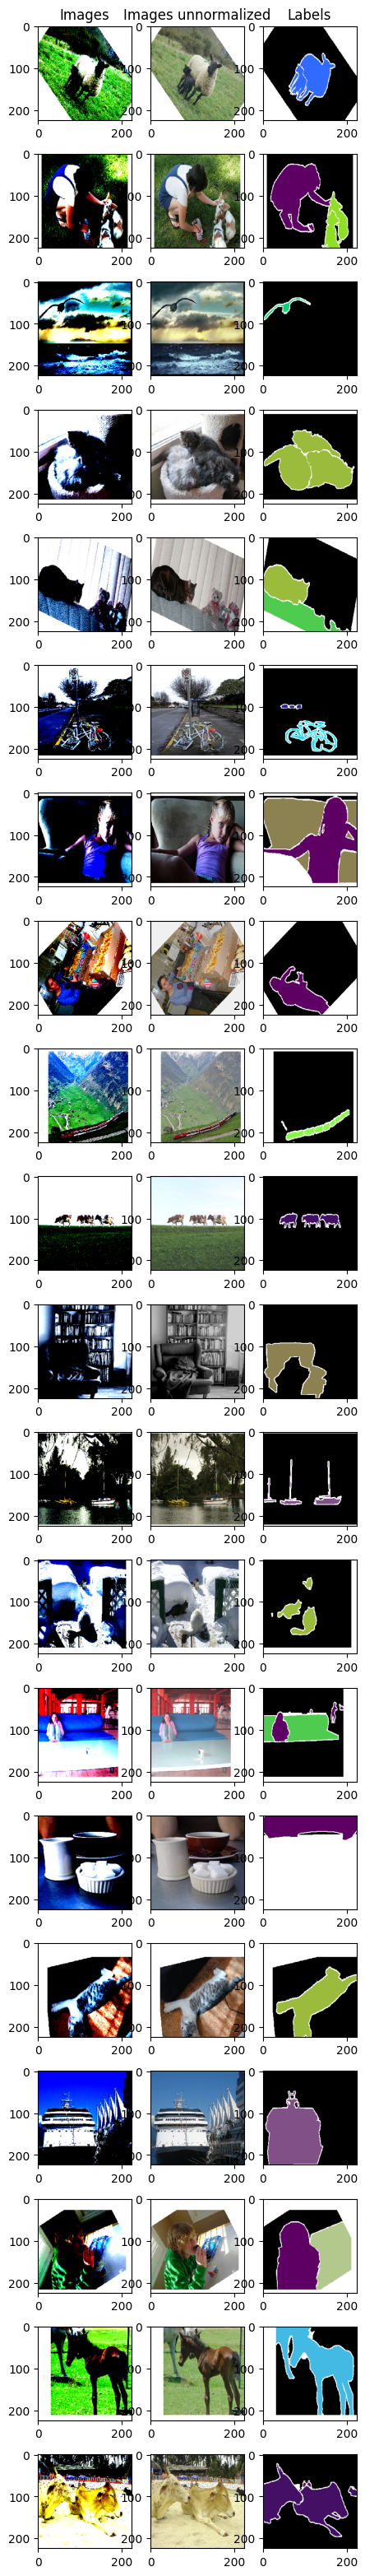

In [6]:
display_images(
    dataset=train_ds,
    rows=20,
    size=40
    )

100%|██████████| 20/20 [00:00<00:00, 5239.61it/s]

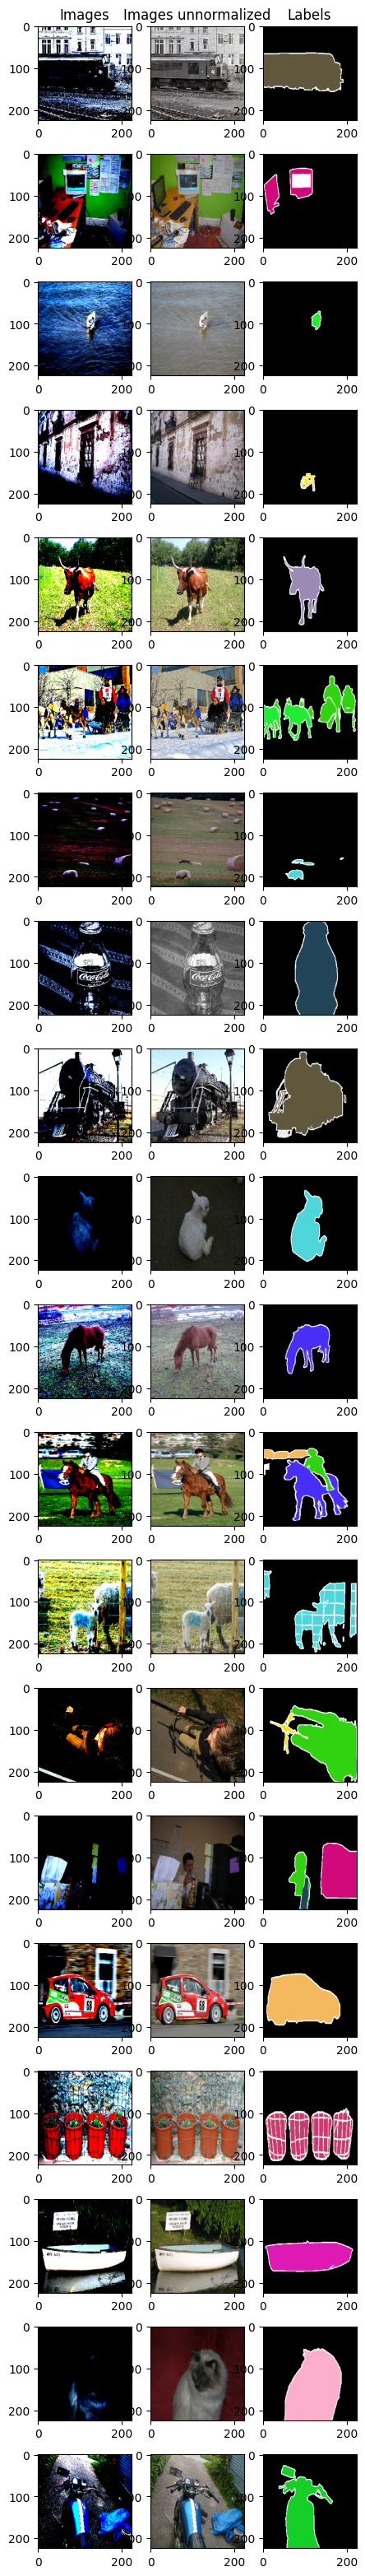

In [7]:
display_images(
    dataset=val_ds, 
    rows=20,
    size=40
    )